In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
import numpy as np

# Get the unique values (labels) in y_train
unique_labels = np.unique(y_train)

print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


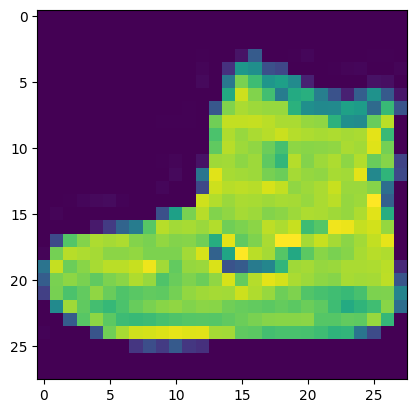

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.reshape(-1,28,28,1)

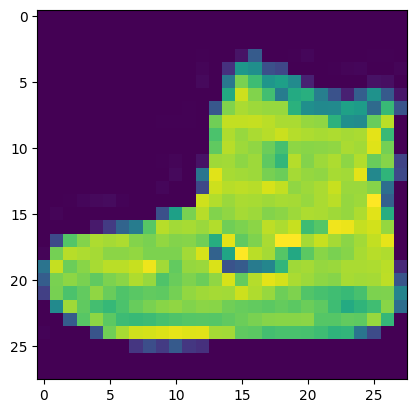

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7204 - loss: 0.7465 - val_accuracy: 0.8708 - val_loss: 0.3669
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8614 - loss: 0.3727 - val_accuracy: 0.8831 - val_loss: 0.3264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8857 - loss: 0.3108 - val_accuracy: 0.8972 - val_loss: 0.2825
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8952 - loss: 0.2849 - val_accuracy: 0.8973 - val_loss: 0.2774
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9021 - loss: 0.2641 - val_accuracy: 0.8965 - val_loss: 0.2777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9096 - loss: 0.2415 - val_accuracy: 0.9024 - val_loss: 0.2760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9098 - loss: 0.2354 - val_accuracy: 0.9081 - val_loss: 0.2483
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9176 - loss: 0.21

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9083 - loss: 0.2617

Test Accuracy: 0.9101
Test Loss: 0.2515


In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


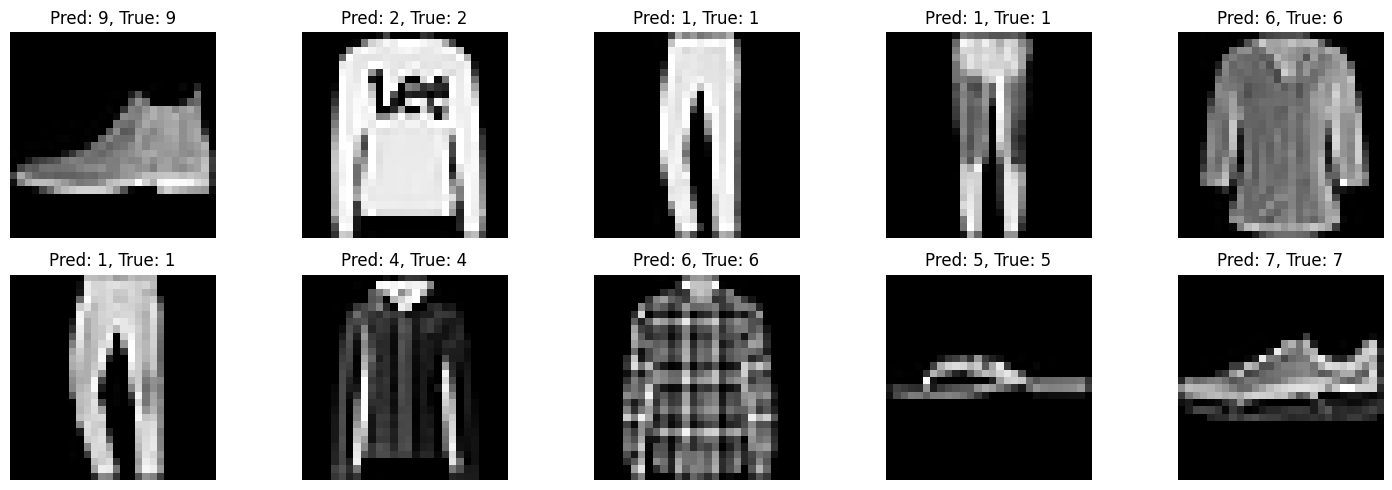

In [16]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])  # prediction is a probability array
    true_label = y_test[i]
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()